# PRACTICA 2  
## LABORATORIO DE SEMINARIO DE SISTEMAS 2
### Juan Francisco Urbina Silva - 201906051


#### Objetivos

* Desarrollar un notebook de análisis de datos que permita la carga, 
manipulación, visualización y generación de informes a partir de conjuntos de 
datos utilizando las librerías Pandas, NumPy y Matplotlib.

* Implementar técnicas de limpieza y transformación de datos utilizando Pandas 
para preparar el conjunto de datos.

* Crear visualizaciones interactivas y altamente informativas utilizando 
Matplotlib que permitan a los tomadores de decisiones explorar visualmente 
los datos.

## DATOS UTILIZADOS PARA LA PRACTICA

### Importacion de funciones

In [1]:
from functions import *

## Lectura de datos de CSV con pandas y DataFrame

In [2]:
import pandas as pd

ruta_archivo = "./doc/Datos.csv"

df = pd.read_csv(ruta_archivo)

# Se seleccionarán las columnas necesarias
df_reducido = df[['Course Title', 'Rating', 'Level', 'Duration', 'Schedule', 'Review', 'Keyword']]

df_reducido

,Course Title,Rating,Level,Duration,Schedule,Review,Keyword
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",Arts and Humanities
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,Arts and Humanities
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,Arts and Humanities
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,Arts and Humanities
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Arts and Humanities
...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,Social Sciences
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Social Sciences
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,Social Sciences
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Social Sciences


## Limpieza y Validación de registros

In [3]:
# Filtrar el DataFrame
df_reducido = df_reducido.copy()

# Aplicar las funciones de limpieza a cada columna
df_reducido['Course Title'] = df_reducido['Course Title'].apply(limpiar_course_title)
df_reducido['Rating'] = df_reducido['Rating'].apply(limpiar_rating)
df_reducido['Level'] = df_reducido['Level'].apply(limpiar_level)
df_reducido['Duration'] = df_reducido['Duration'].apply(limpiar_duration)
df_reducido['Schedule'] = df_reducido['Schedule'].apply(limpiar_schedule)
df_reducido['Review'] = df_reducido['Review'].apply(limpiar_review)
df_reducido['Keyword'] = df_reducido['Keyword'].apply(limpiar_keyword)

# Validar los registros y obtener un nuevo DataFrame solo con registros válidos
df_valido = validar_registro(df_reducido)

# Mostrar el DataFrame con los registros válidos
print("Registros válidos:")
df_valido


Registros válidos:


,Course Title,Rating,Level,Duration,Schedule,Review,Keyword
0,fashion as design,4.8,beginner level,20.0,Flexible,2813.0,arts and humanities
1,modern american poetry,4.4,beginner level,34.0,Flexible,100.0,arts and humanities
2,pixel art for video games,4.5,beginner level,9.0,Flexible,227.0,arts and humanities
4,the blues understanding and performing an amer...,4.8,beginner level,11.0,Flexible,582.0,arts and humanities
5,so you think you know tango,4.6,beginner level,5.0,Flexible,107.0,arts and humanities
...,...,...,...,...,...,...,...
9585,sistemática de comércio exterior,4.7,beginner level,22.0,Flexible,18.0,social sciences
9588,potenciando mi aprendizaje en el primer año de...,4.9,beginner level,21.0,Flexible,1123.0,social sciences
9589,cities are back in town sociología urbana par...,4.7,beginner level,11.0,Flexible,72.0,social sciences
9590,power onboarding,4.1,beginner level,7.0,Flexible,36.0,social sciences


## Cálculo de promedio de calificaciones por curso

In [4]:
# Calcular promedio de calificaciones por curso
promedio_calificaciones_df = promedio_calificaciones(df_valido)
print("Promedio de calificaciones por curso:")
print(promedio_calificaciones_df)

Promedio de calificaciones por curso:
                                           Course Title  \
0      assisting public sector decision makers with ...   
1      atención prehospitalaria del ictus agudo y se...   
2      comercio inmigración y tipos de cambio en un ...   
3      fpga computing systems background knowledge a...   
4                      future healthcare payment models   
...                                                 ...   
4046                                              走进天文学   
4047                             頑想學概率機率一 probability 1   
4048                    食品安全與毒理 food safety  toxicology   
4049                  食品安全與風險分析food safetyrisk analysis   
4050                                         파이썬 단기집중과정   

      Promedio Calificaciones  
0                         4.8  
1                         4.9  
2                         4.9  
3                         4.6  
4                         4.5  
...                       ...  
4046                      4.9

## Cálculo de cursos con mayor y menor rating

In [5]:
# Obtener los cursos con mayor y menor rating
cursos_max_rating, cursos_min_rating = cursos_mayor_menor_rating(df_valido)
print("Cursos con mayor rating:")
print(cursos_max_rating)
print("\nCursos con menor rating:")
print(cursos_min_rating)

Cursos con mayor rating:
                                                Curso  Rating
0                       songwriting writing the music     5.0
1                          western religions  ecology     5.0
2             el holocausto el abismo de la humanidad     5.0
3                         莊子人情 zhuangzibetween people     5.0
4           exploring beethovens piano sonatas part 2     5.0
..                                                ...     ...
68   claves para la igualdad de género specialization     5.0
69           tecnologías para la innovación educativa     5.0
70  escola 40 educação e cultura maker no contexto...     5.0
71  activity design with phet simulations for stem...     5.0
72                                   sistemas difusos     5.0

[73 rows x 2 columns]

Cursos con menor rating:
                                               Curso  Rating
0  software architecture for big data specialization     3.1
1        deep learning for healthcare specialization     3.1

## Cálculo de cursos (porcentaje) con horario flexible en relación al conjunto de datos original

In [6]:
# Porcentaje de cursos con horario flexible
porcentaje_horario_flexible_df = calcular_porcentaje_horario_flexible(df_valido)
print("Porcentaje de cursos con horario flexible respecto al total de cursos:")
print(porcentaje_horario_flexible_df)

Porcentaje de cursos con horario flexible respecto al total de cursos:
100.0


## Gráficas

Cursos por nivel


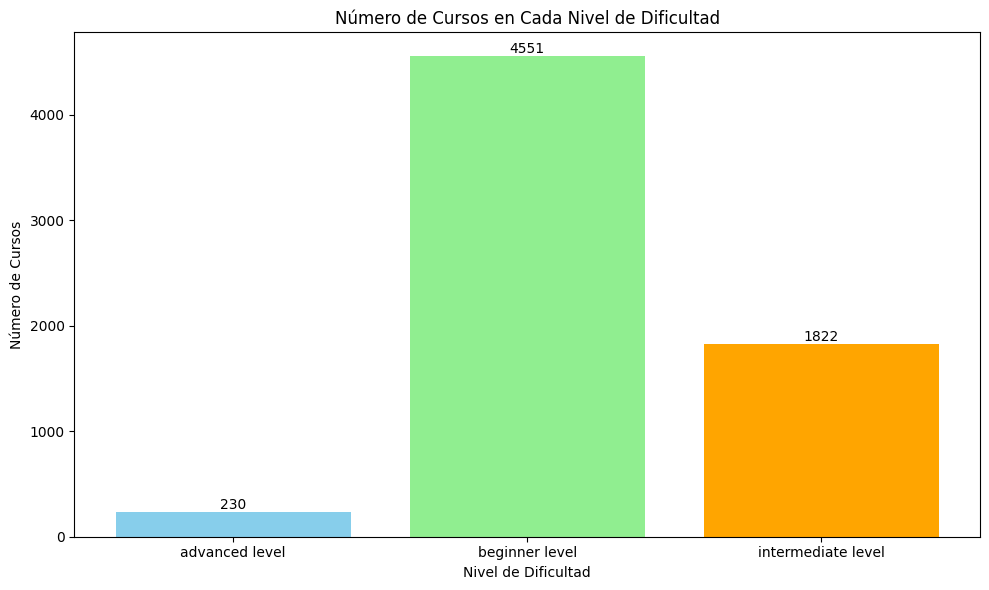

Cursos en las principales categorias (top 5)


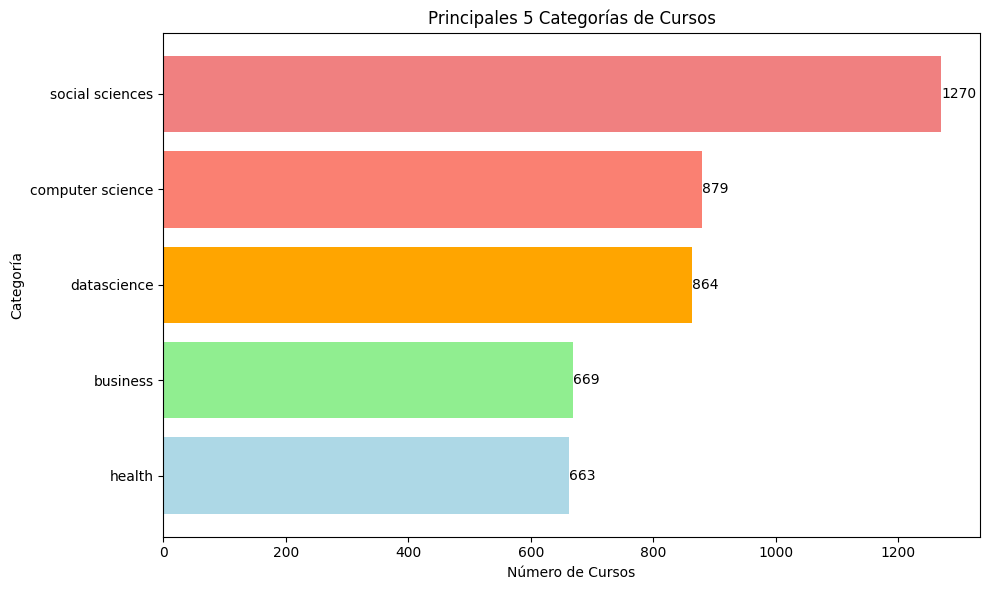

Relación entre duración de curso y cantidad de reviews


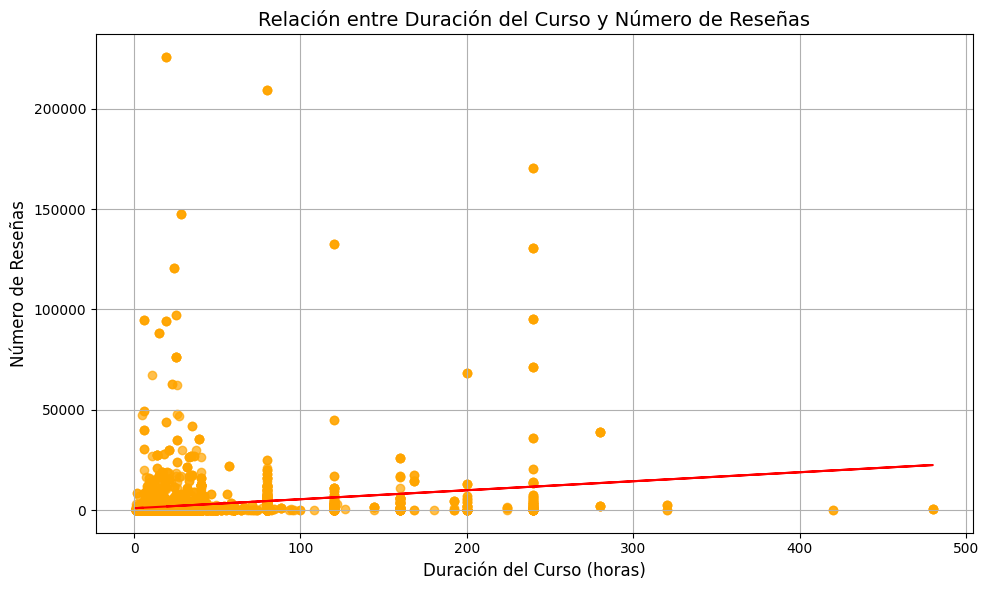

Histograma de distribución de duraciones de los cursos


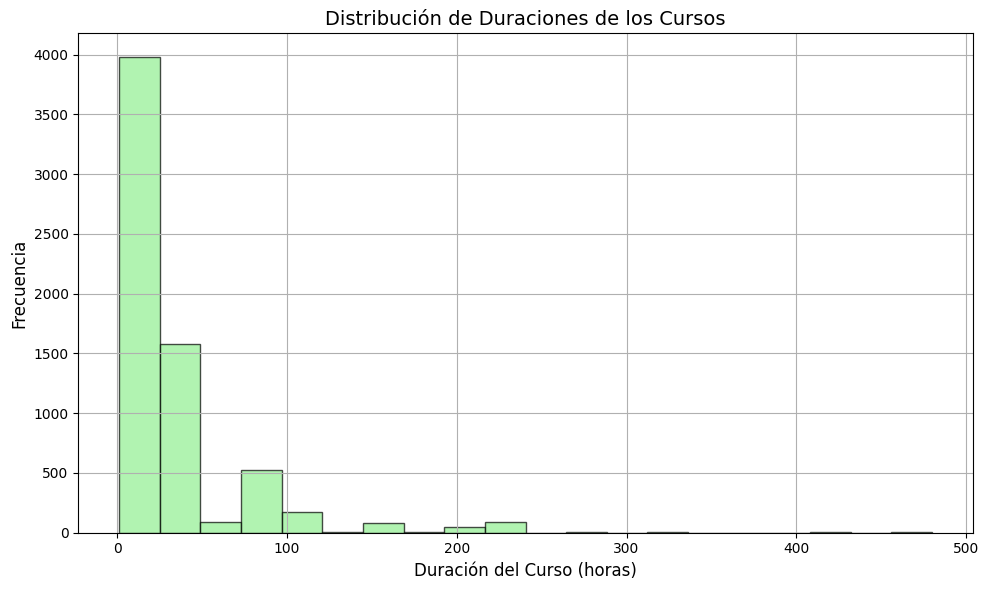

Grafica de cajas de calificaciones según nivel de dificultad


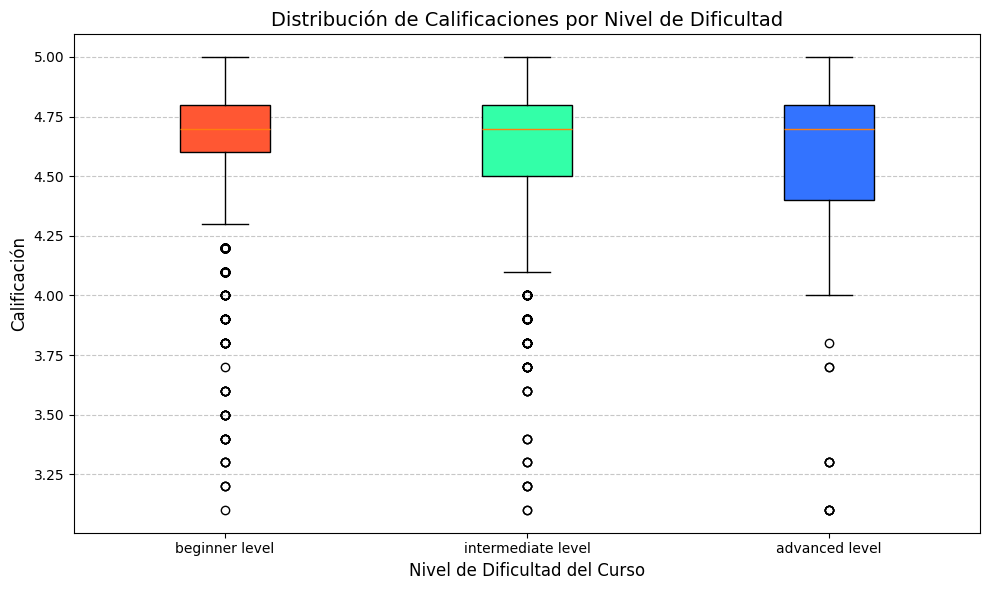

In [7]:
# Generar gráficas
print('Cursos por nivel')
grafica_nivel_dificultad(df_valido)
print('Cursos en las principales categorias (top 5)')
grafica_categorias(df_valido)
print('Relación entre duración de curso y cantidad de reviews')
grafica_dispersion(df_valido)
print('Histograma de distribución de duraciones de los cursos')
histograma_duraciones(df_valido)
print('Grafica de cajas de calificaciones según nivel de dificultad')
grafico_caja_calificaciones_por_nivel(df_valido)

## Carga archivos TXT

### Importacion librerias

In [8]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer

### Descarga de recursos (NLTK) / Carga de modelo (español) / Inicialización de recursos NLTK

In [9]:
# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

# Cargar el modelo de SpaCy para español
nlp = spacy.load('es_core_news_sm')

# Inicializar recursos de NLTK
stop_words = set(stopwords.words('spanish'))
sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Inicializar contadores
frecuencia_palabras = nltk.FreqDist()
sentimiento_acumulado = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
num_lineas_procesadas = 0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pacos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pacos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pacos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pacos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Funcion de procesamiento del archivo de texto

In [10]:
def procesar_linea(linea):
    global num_lineas_procesadas
    # Tokenización básica
    tokens = re.findall(r'\b\w+\b', linea)

    # Filtrar palabras vacías
    tokens_limpios = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # Lematización y Stemming
    lemas = [lemmatizer.lemmatize(word) for word in tokens_limpios]
    stems = [stemmer.stem(word) for word in tokens_limpios]
    
    frecuencia_palabras.update(lemas)

    sentimiento = sia.polarity_scores(linea)
    for key in sentimiento:
        sentimiento_acumulado[key] += sentimiento[key]

    num_lineas_procesadas += 1
    doc = nlp(linea)
    for ent in doc.ents:
        print(f'Entidad: {ent.text}, Tipo: {ent.label_}')

### Procesamiento del archivo

In [11]:
with open('./doc/Comments.txt', 'r', encoding='utf-8') as f:
    for linea in f:
        if linea.strip():
            procesar_linea(linea)

Entidad: Vargas Pérez, Tipo: PER
Entidad: PT, Tipo: ORG
Entidad: Meta, Tipo: LOC
Entidad: Coursera Plus, Tipo: LOC
Entidad: Duré, Tipo: PER
Entidad: Ya llevo, Tipo: MISC
Entidad: está súper, Tipo: PER
Entidad: Quizás, Tipo: MISC
Entidad: discusión, Tipo: LOC
Entidad: En mi caso leí, Tipo: MISC
Entidad: En fin... Yo sí recomiendo coursera, Tipo: MISC
Entidad: Richard, Tipo: PER
Entidad: 1, Tipo: LOC
Entidad: 1, Tipo: LOC
Entidad: Ana
, Tipo: MISC
Entidad: 1, Tipo: LOC
Entidad: ESTAFADORES!!, Tipo: MISC
Entidad: Coursera Plus, Tipo: LOC
Entidad: Airin, Tipo: LOC
Entidad: may, Tipo: PER
Entidad: ESTAFADORES, Tipo: MISC
Entidad: ESTAFADORES, Tipo: MISC
Entidad: No hay forma de comunicarse y reclamarlo, Tipo: MISC
Entidad: Maria Eugenia Simancas Soriano
, Tipo: PER
Entidad: 1, Tipo: LOC
Entidad: US, Tipo: LOC
Entidad: Coursera!!!, Tipo: MISC
Entidad: Coursera!!!, Tipo: MISC
Entidad: Son unos estafadores, Tipo: MISC
Entidad: US, Tipo: LOC
Entidad: Courser Learner, Tipo: PER
Entidad: Curso pa

### Impresion de resultados

In [12]:
print("Frecuencia de palabras más comunes:")
for word, freq in frecuencia_palabras.most_common(10):
    print(f'{word}:'.ljust(20) + f'{freq}')

print("\nSentimiento acumulado:")
print('Negativos:', round(sentimiento_acumulado['neg'] / num_lineas_procesadas, 3))
print('Neutros:  ', round(sentimiento_acumulado['neu'] / num_lineas_procesadas, 3))
print('Positivos:', round(sentimiento_acumulado['pos'] / num_lineas_procesadas, 3))
print('Compuesto:', round(sentimiento_acumulado['compound'] / num_lineas_procesadas, 3))
# print()
# print(sentimiento_acumulado)

Frecuencia de palabras más comunes:
curso:              1301
TA:                 866
Semana:             843
participantes:      822
semana:             780
dudas:              746
portafolio:         743
si:                 553
foros:              511
compañeros:         492

Sentimiento acumulado:
Negativos: 0.023
Neutros:   0.963
Positivos: 0.009
Compuesto: -0.072


## Conclusiones

### Conclusión General del Análisis Realizado

En el análisis del archivo de texto (txt) se proceso un archivo realizando un análisis detallado (por tokenización), en lo que concluyo con lo siguiente:

* **__`Tokenización y Eliminación de Palabras Vacías:`__** Se dividió el texto en palabras individuales, filtrando las palabras vacías (como preposiciones y artículos) que no aportan valor significativo al análisis. Esto permitió enfocarse en las palabras más relevantes del texto.

* **__`Lematización y Stemming:`__** Se aplicaron técnicas de lematización y stemming; ayudando a uniformar el análisis y permitiendo a tratar con diferentes formas de una palabra como equivalentes, siendo crucial para evitar duplicaciones y mejorar la precisión del análisis.

* **__`Frecuencia de Palabras:`__** Se calculó la frecuencia de las palabras más comunes en el texto, proporcionando una visión de las palabras más repetidas. Teniendo un análisis para la identiricación de temas y/o términos clave que dominan el texto.

* **__`Análisis de Sentimientos:`__** Se utilizó el analizador de sentimientos `VADER` de `NLTK`, evaluando la carga emocional del texto; mostrando como resuultados el sentimiento predominante que en este caso es el negativo y un compuesto la cual refuerza esta conclusión. Tambien se observó un porcentaje alto para el contenido neutro en donde no es de extrañar ya que es un archivo con gran cantidad de información descriptiva.

* **__`Reconocimiento de Entidades Nombradas:`__** Se utilizó SpaCy en la identificación y extracción de entidades nombradas (personas, organizaciones, lugares, entre otros); permitiendo la identificación de la información del texto y la obtención clara de los sujetos y temas mencionados.


### Conclusión del Uso de Python en el Análisis de Datos

La flexibilidad de Python demuestra ser una herramienta tanto flexible como poderosa para el análisis de datos textuales y del procesamiento del lenguaje natural; teniendo como conclusiones lo siguiente:

* **__`Eficiencia en el Manejo de Grandes Volúmenes de Datos:`__** Python en conjunto con bibliotecas como NLTK y SpaCy, se encarga del manejo de archivos de gran cantidad de información de manera eficiente, procesando el archivo linea a linea, permitiendo la realización del análisis sin consumir excesivos recursos de memoria.

* **__`Versatilidad en el Procesamiento del Lenguaje Natural (NLP):`__** Python proporciona potentes herramientas para el procesamiento del lenguaje natural a través de bibliotecas como NLTK y SpaCy, las cuales son herramientas que permiten tokenizar, lematizar, realizar análisis de sentimientos y el reconocimiento de entidades nombradas con gran precisión, facilitando el análisis de textos en diferentes idiomas.

* **__`Acceso a Recursos Preentrenados:`__** Python facilita el acceso a modelos preentrenados, como los que proporciona VADER para el análisis de sentimientos o SpaCy para el etiquetado POS y el reconocimiento de entidades nombradas, lo cuál permite a los usuarios el poder realizar análisis avanzados sin necesidad de entrenar modelos.

* **__`Interoperabilidad y Flexibilidad:`__** Python ofrece una gran compatibilidad entre bibliotecas, permitiendo de esta forma combinar las fortalezas de diferentes herramientas. En este análisis, usamos NLTK para ciertas tareas (análisis de sentimientos, lematización) y SpaCy para otras (reconocimiento de entidades nombradas).

* **__`Automatización y Escalabilidad:`__** Python permite la automatización en el análisis de grandes volúmenes de datos de manera repetible y escalable. Dicho análisis que se realiza puede ser fácilmente adaptado para grandes volumenes de texto y de esa forma procesar una cantidad masiva de datos.

* **__`Visualización de datos`__**: Matplotlib ofrece una gran flexibilidad para crear visualizaciones personalizadas y de alta calidad, lo que permite a los analistas comunicar de manera efectiva los resultados del análisis de datos.